<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_B_Interpolation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour
# MAT 421
# Module B: Interpolation Part 2

## Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is a method used to construct a single polynomial that passes exactly through a given set of data points. Unlike piecewise interpolation methods such as linear or cubic splines, Lagrange interpolation finds a single polynomial of degree $( n-1 )$ for $( n )$ data points. This polynomial is formed as a weighted sum of Lagrange basis polynomials, which are designed to be 1 at their corresponding data point and 0 at all others.

The interpolation polynomial is given by:

$$
P(x) = \sum_{i=0}^{n} y_i L_i(x)
$$

where each Lagrange basis polynomial $( L_i(x) )$ is defined as:

$$
L_i(x) = \prod_{\substack{j=0 \\ j\neq i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

This ensures that $( P(x) )$ interpolates the dataset exactly. In the next steps, an interpolated value is manually computed using this method and the resulting polynomial is visualized.


## Lagrange Polynomial Interpolation: Manual Calculation and Visualization

In this section, an interpolated value is manually computed at $ x = 3.5 $ using the Lagrange interpolation formula:

$$
P(x) = \sum_{i=0}^{n} y_i L_i(x)
$$

where the Lagrange basis polynomials are defined as:

$$
L_i(x) = \prod_{\substack{j=0 \\ j\neq i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

This ensures that each basis polynomial is 1 at its corresponding $ x_i $ and 0 at all other points. $ P(3.5) $ is computed using this formula and compared with the result from Python’s "lagrange" function in SciPy. Finally, the full interpolating polynomial is visualized.


The manually computed interpolated value at x = 3.5 is approximately y = 3.1193



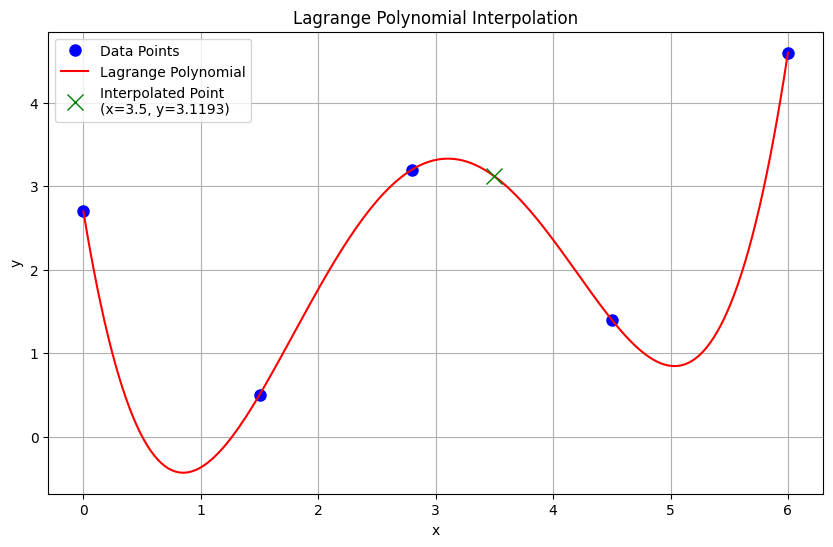

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the data points
x = np.array([0, 1.5, 2.8, 4.5, 6])
y = np.array([2.7, 0.5, 3.2, 1.4, 4.6])

# Choose the target x-value for interpolation
x_target = 3.5

# Manually compute the interpolated value using Lagrange formula
def lagrange_basis(x_values, x_target, index):
    """Compute L_i(x) for a given index."""
    L = 1
    x_i = x_values[index]
    for j in range(len(x_values)):
        if j != index:
            L *= (x_target - x_values[j]) / (x_i - x_values[j])
    return L

# Compute P(x_target) using the Lagrange interpolation formula
P_x_target = sum(y[i] * lagrange_basis(x, x_target, i) for i in range(len(x)))

print(f"The manually computed interpolated value at x = {x_target} is approximately y = {P_x_target:.4f}\n")

# Generate the full Lagrange interpolating polynomial using SciPy
lagrange_poly = lagrange(x, y)

# Generate new x values for plotting
x_new = np.linspace(min(x), max(x), 200)
y_new = lagrange_poly(x_new)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points', markersize=8, color='blue')  # Original data points
plt.plot(x_new, y_new, '-', label='Lagrange Polynomial', color='red')  # Interpolating polynomial
plt.plot(x_target, P_x_target, 'x', label=f'Interpolated Point\n(x={x_target}, y={P_x_target:.4f})', markersize=12, color='green')  # Manually computed point
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Newton’s Polynomial Interpolation

Newton’s Polynomial Interpolation is an alternative method for constructing an interpolating polynomial that passes exactly through a given set of data points. Unlike Lagrange interpolation, Newton’s method builds the polynomial incrementally using divided differences, making it more efficient when adding new data points. The interpolating polynomial is expressed in the **Newton form**:

$$
P(x) = f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) + \dots + f[x_0, x_1, \dots, x_n] (x - x_0)(x - x_1) \dots (x - x_{n-1})
$$

where $f[x_0, x_1, \dots, x_k]$ represents the divided difference, which recursively calculates the coefficients of the polynomial. This approach allows for a structured and computationally efficient method for polynomial interpolation. In this section, we will manually compute an interpolated value using Newton’s method and compare it with Python’s implementation.


## Newton’s Polynomial Interpolation: Manual Calculation and Visualization

In this section, an interpolated value is manually computed at $ x = 3.5 $ using Newton’s Divided Difference method. The Newton interpolating polynomial is constructed as:

$$
P(x) = f[x_0] + f[x_0, x_1] (x - x_0) + f[x_0, x_1, x_2] (x - x_0)(x - x_1) + \dots
$$

where each term $ f[x_0, x_1, \dots] $ represents a **divided difference**, computed as:

$$
f[x_i, x_{i+1}] = \frac{f[x_{i+1}] - f[x_i]}{x_{i+1} - x_i}
$$

$$
f[x_i, x_{i+1}, x_{i+2}] = \frac{f[x_{i+1}, x_{i+2}] - f[x_i, x_{i+1}]}{x_{i+2} - x_i}
$$

By constructing a divided difference table, the coefficients are found and used to interpolate a value. The manual calculation is compared with Python’s implementation of Newton’s method and the resulting polynomial is visualized.


The manually computed interpolated value at x = 3.5 is approximately y = 3.1193



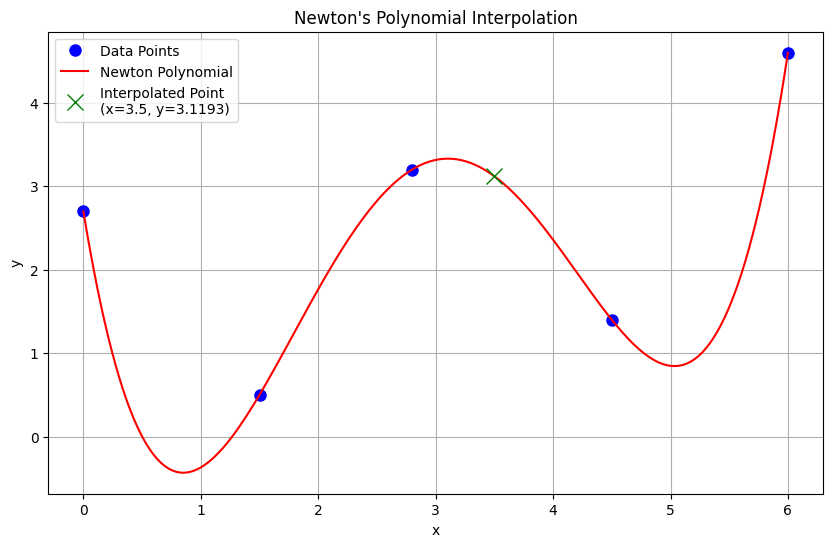

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# Define the data points
x = np.array([0, 1.5, 2.8, 4.5, 6])
y = np.array([2.7, 0.5, 3.2, 1.4, 4.6])

# Function to compute divided difference table
def divided_diff_table(x, y):
    """Computes the divided difference table."""
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # First column is just y values

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

    return coef[0, :]  # Return only the first row (coefficients)

# Compute the divided difference coefficients
coefficients = divided_diff_table(x, y)

# Function to evaluate Newton's polynomial at a given x value
def newton_interpolation(x_values, coefficients, x_target):
    """Evaluates Newton's interpolating polynomial at x_target."""
    n = len(coefficients)
    result = coefficients[0]
    term = 1.0
    for i in range(1, n):
        term *= (x_target - x_values[i-1])
        result += coefficients[i] * term
    return result

# Choose the target x-value for interpolation
x_target = 3.5
y_target = newton_interpolation(x, coefficients, x_target)

print(f"The manually computed interpolated value at x = {x_target} is approximately y = {y_target:.4f}\n")

# Generate new x values for plotting
x_new = np.linspace(min(x), max(x), 200)

# Use SciPy's BarycentricInterpolator (efficient Newton interpolation)
newton_interp = BarycentricInterpolator(x, y)
y_new = newton_interp(x_new)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points', markersize=8, color='blue')  # Original data points
plt.plot(x_new, y_new, '-', label='Newton Polynomial', color='red')  # Interpolating polynomial
plt.plot(x_target, y_target, 'x', label=f'Interpolated Point\n(x={x_target}, y={y_target:.4f})', markersize=12, color='green')  # Manually computed point
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
